# COMPSCI 714 - Assignment 1

This assignment will evaluate the content covered in weeks 1 & 2. This assignment aims at evaluating your coding skills, aligned with what we covered in the lectutorials, but also your critical thinking and self-learning abilities with a few more advanced questions.

**Name**: Pankaj Monga


## **Part 1: Data loading, exploration, cleaning and pre-processing** - 17 marks

Some of the libraries useful to this part are found in the following cell. You might need to import some more yourself for some of the tasks.

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

### **Task 1: Load the dataset** - 1 mark
The dataset used in the assignment contains multiple attributes of houses and their target sale price stored in `SalePrice`. \
You can find information about each attribute in the "Housing Price Data Dictionnary.txt" file.

**Task deliverable**:
- Load the dataset contained in the file *house_prices.csv* as a Pandas DataFrame in a variable called `df_data`.

In [ ]:
file_path = "house_prices.csv"
if Path(file_path).is_file():
    df_data = pd.read_csv(file_path)
else:
    print("Error: The file not found.")

### **Task 2: Extract basic dataset information** - 2 marks

**Task deliverable**:

Complete the `extract_basic_info()` function which takes a tabular dataset in the form of a Pandas Dataframe as parameter, and returns a tuple containing the following information:
- The number of instances in the dataset.
- The total number of attributes in the dataset.
- The number of numerical attributes.
- The number of categorical attributes.
- The total memory size of the dataset.

The order of the elements in the returned tuple should follow the same order as follow: (number of instances, totoal number of attributes, number of numerical attributes, number of categorical attributes, total memory size).

**Remarks**:
- For this task, we define a numerical attribute as an attribute having numeric values. These values could represent a continuous or categorical attribute. Contrastively, we define a symbolic attribute as an attribute having non-numeric values.
- During grading, your function will be tested with the dataset previously loaded, but also with other hidden datasets. Make sure to test it to make sure it works fine on a few other datasets.

In [ ]:
def extract_basic_info(df_dataset):
    total_instances = df_dataset.shape[0]
    total_attributes = df_dataset.shape[1]
    total_numerical_attributes = df_dataset.select_dtypes(include=['number']).shape[1]
    total_nonnumerical_attributes = df_dataset.select_dtypes(exclude=['number']).shape[1]
    total_memory = df_dataset.memory_usage(deep=True).sum().item()
    return(total_instances, total_attributes, total_numerical_attributes, total_nonnumerical_attributes, total_memory)

In [ ]:
print(extract_basic_info(df_data))

(1460, 81, 35, 46, 3919398)


### **Task 3: Basic exploration** - 2 marks

#### **Task 3.1 - Histograms of surface attributes** - 1 mark
This question is based on the dataset loaded in Task 1.

**Task deliverable**:
- Identify the 14 attributes representing areas in square feet in the dataset, and plot them as histograms.

**Remark**: Having a look in the data dictionary provided with the dataset might help.


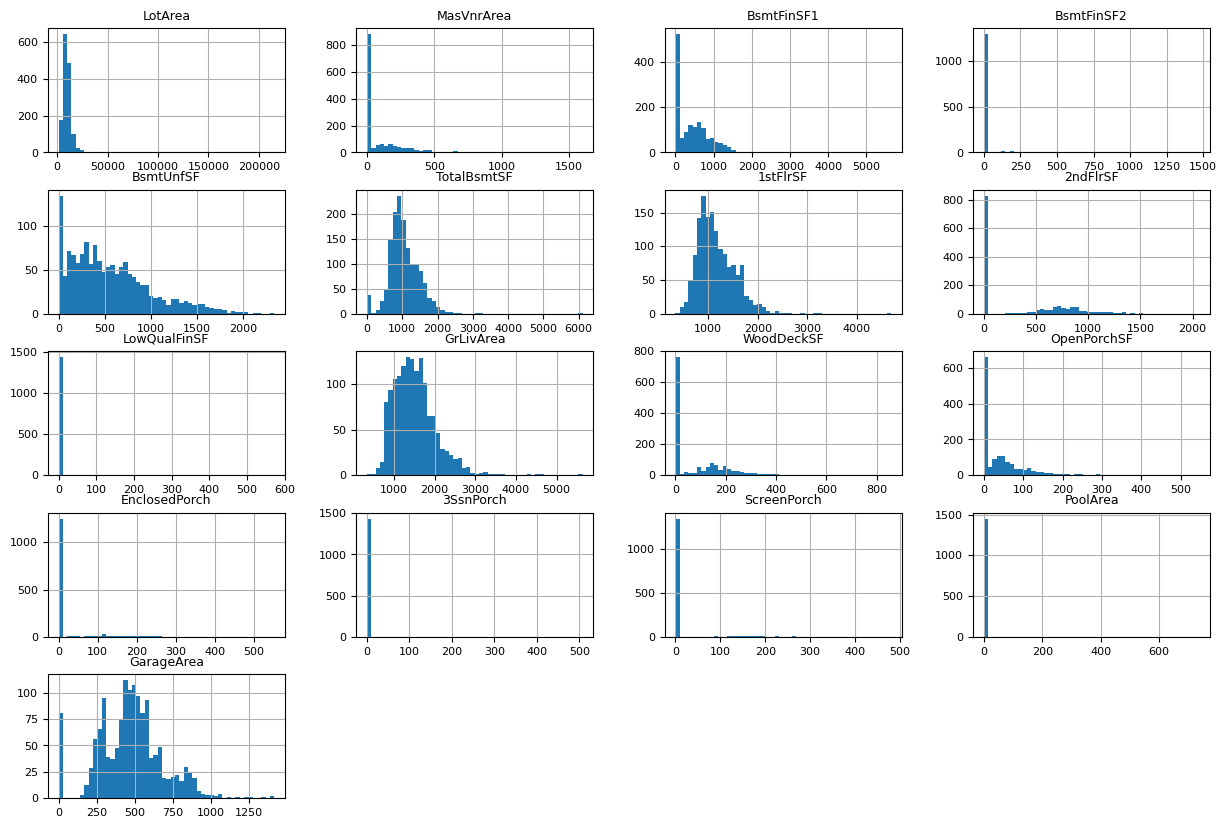

In [ ]:
#fix column 'MnsVarArea'
df_data['MasVnrArea'] = pd.to_numeric(df_data['MasVnrArea'], errors='coerce')

# List of columns representing measurements in square feet
sqft_columns = [
    'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
    'PoolArea', 'GarageArea']
sqft_columns_dataset = df_data[sqft_columns]

#set graph parameters
plt.rc('font', size=9)
plt.rc('axes', labelsize=9, titlesize=9)
plt.rc('legend', fontsize=9)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

# plot the histograms for the sqft columns
sqft_columns_dataset.hist(bins=50, figsize=(15, 10))
plt.show()

#### **Task 3.2: Correlations with target** - 1 mark
**Task deliverable**:
- Display in descending order the correlation coefficients between the 14 area attributes identified previously and the target attribute `SalePrice`.

In [ ]:
# Calculate correlation coefficients with 'SalePrice'
correlation_with_SalePrice = sqft_columns_dataset.corrwith(df_data['SalePrice'])

# Display correlations in descending order
print(correlation_with_SalePrice.sort_values(ascending=False))

GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
MasVnrArea       0.477493
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotArea          0.263843
BsmtUnfSF        0.214479
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
LowQualFinSF    -0.025606
EnclosedPorch   -0.128578
dtype: float64


### **Task 4: Splitting the data in train and test sets** - 4 marks
The dataset has a modest size, so it might be worth investigating the use of stratified sampling.

#### **Task 4.1: Selecting and preparing an attribute for the sampling** - 2 marks

**Task deliverables**:

1. Select the area attribute (from Task 3.2) with the highest correlation to the target `SalePrice`. \
Based on the selected attribute, sort the instances into 4 bins. The bins edges are defined as: [$0$, $median \times 0.5$, $median$, $median \times 1.5$, $\infty$]. \
$median$ corresponds to the median value of the previously selected area attribute's values. \
Create a new attribute corresponding to the category each instance (house) is binned into.
3. Visualise the number of instances (houses) in each category with a bar plot.

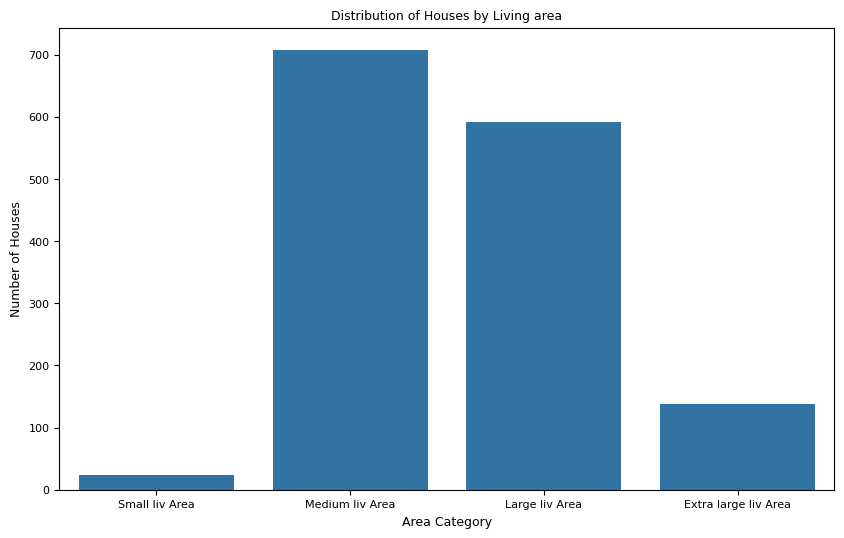

In [ ]:
highest_corr_Attr = correlation_with_SalePrice.idxmax()

#Calculate Median
median_value = df_data[highest_corr_Attr].median()

#Bin the data
bin_edges = [0, median_value * 0.5, median_value, median_value * 1.5, np.inf]
bin_labels = ['Small liv Area', 'Medium liv Area', 'Large liv Area', 'Extra large liv Area']
df_data['Liv_Area_Category'] = pd.cut(df_data[highest_corr_Attr], bins=bin_edges, labels=bin_labels, include_lowest=True)
#Bar plot data
category_counts = df_data['Liv_Area_Category'].value_counts().reindex(bin_labels)

#Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Area Category')
plt.ylabel('Number of Houses')
plt.title(f'Distribution of Houses by Living area')
plt.show()

#### **Task 4.2: Train/valid/test sets split using stratified sampling** - 2 marks

**Task deliverable**:

1. Split the dataset into train, validation and test sets using stratified sampling based on the the new categorical attribute you created in Task 4.1. Use a 60%/20%/20% split for train/validation/test sets.
2. Compare the proportions of instances (in percentage) for each category in:
   - the overall dataset,
   - the stratified train and test sets, and
   - randomly splitted train and test sets (without stratified sampling).
   
   Briefly explain the difference of results between stratified and random sampling. Does the choice of stratified sampling make sense in that case?

**Remark**:
- Don't forget to drop the new feature created for stratifed sampling from the training and test sets after completing this task.


In [ ]:
from sklearn.model_selection import train_test_split

#split into stratified training and temporary (40%) set
strat_train_set, strat_temp_set = train_test_split(
    df_data, test_size=0.4, stratify=df_data["Liv_Area_Category"], random_state=42)
#split into stratified test and validation (each 20% of original data) set
strat_validation_set, strat_Test_set = train_test_split(
    strat_temp_set, test_size=0.5, stratify=strat_temp_set["Liv_Area_Category"], random_state=42)

#split into random training and temporary (40%) set
random_train_set, random_temp_set = train_test_split(
    df_data, test_size=0.4, random_state=42)
#split into random test and validation (each 20% of original data) set
random_validation_set, random_Test_set = train_test_split(
    random_temp_set, test_size=0.5, random_state=42)

#function to count proportions
def LArea_cat_proportions(pdataset):
    return pdataset["Liv_Area_Category"].value_counts() / len(pdataset)

compare_proportions = pd.DataFrame({
         "%ages Overall data": LArea_cat_proportions(df_data),
         "%ages stratified Training data": LArea_cat_proportions(strat_train_set),
         "%ages stratified Validation data": LArea_cat_proportions(strat_validation_set),
         "%ages stratified Test data": LArea_cat_proportions(strat_Test_set),
         "%ages random Training data": LArea_cat_proportions(random_train_set),
         "%ages random Validation data": LArea_cat_proportions(random_validation_set),
         "%ages random Test data": LArea_cat_proportions(random_Test_set),
}).sort_index()

compare_proportions.index.name = "Living Area Category"
compare_proportions["stratified Training data Error %"] = (compare_proportions["%ages stratified Training data"] /
                                   compare_proportions["%ages Overall data"] - 1)
compare_proportions["stratified Validation data Error %"] = (compare_proportions["%ages stratified Validation data"] /
                                   compare_proportions["%ages Overall data"] - 1)
compare_proportions["stratified Test data Error %"] = (compare_proportions["%ages stratified Test data"] /
                                  compare_proportions["%ages Overall data"] - 1)
compare_proportions["random Training data Error %"] = (compare_proportions["%ages random Training data"] /
                                   compare_proportions["%ages Overall data"] - 1)
compare_proportions["random Validation data Error %"] = (compare_proportions["%ages random Validation data"] /
                                   compare_proportions["%ages Overall data"] - 1)
compare_proportions["random Test data Error %"] = (compare_proportions["%ages random Test data"] /
                                  compare_proportions["%ages Overall data"] - 1)

(compare_proportions * 100).round(2)


,%ages Overall data,%ages stratified Training data,%ages stratified Validation data,%ages stratified Test data,%ages random Training data,%ages random Validation data,%ages random Test data,stratified Training data Error %,stratified Validation data Error %,stratified Test data Error %,random Training data Error %,random Validation data Error %,random Test data Error %
Living Area Category,,,,,,,,,,,,,
Small liv Area,1.58,1.60,1.71,1.37,1.37,1.71,2.05,1.45,8.70,-13.04,-13.04,8.70,30.43
Medium liv Area,48.49,48.52,48.29,48.63,48.63,46.58,50.00,0.05,-0.42,0.28,0.28,-3.95,3.11
Large liv Area,40.48,40.41,40.75,40.41,40.30,41.10,40.41,-0.17,0.68,-0.17,-0.45,1.52,-0.17
Extra large liv Area,9.45,9.47,9.25,9.59,9.70,10.62,7.53,0.24,-2.17,1.45,2.66,12.32,-20.29


In [ ]:
# Drop the Area_Category column from train, validation, and test sets
strat_train_set = strat_train_set.drop(columns=['Liv_Area_Category'])
strat_validation_set = strat_validation_set.drop(columns=['Liv_Area_Category'])
strat_Test_set = strat_Test_set.drop(columns=['Liv_Area_Category'])


### **Task 5: Pre-processing pipeline** - 4 marks

**Task deliverables**:
1. Build a pre-processing pipeline with:
    - Missing values handling based on median for numerical attributes and most frequent value for categorical attributes.
    - Standardisation for numerical attributes.
    - Categorical attributes encoding with one-hot encoding.

2. *Fit and apply* the pipeline to the stratified train set, without the target values (`SalePrice`). Then, *apply* the fitted pipeline to the stratified validation and test sets, without the target values.

3. Did the number of attributes in the sets change after applying this pre-processing pipeline? If yes, briefly explain why.


In [ ]:
# Create copies of datasets without the target variable 'SalePrice'
train_set_without_target = strat_train_set.drop(columns=['SalePrice']).copy()
validation_set_without_target = strat_validation_set.drop(columns=['SalePrice']).copy()
test_set_without_target = strat_Test_set.drop(columns=['SalePrice']).copy()

In [ ]:
train_set_attributes_before_PP = train_set_without_target.shape[1]
validation_set_attributes_before_PP = validation_set_without_target.shape[1]
test_set_attributes_before_PP = test_set_without_target.shape[1]
print(train_set_attributes_before_PP, validation_set_attributes_before_PP, test_set_attributes_before_PP)

80 80 80


In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numerical and categorical attributes
numerical_features = train_set_without_target.select_dtypes(include=['number']).columns
categorical_features = train_set_without_target.select_dtypes(include=['object']).columns

# Check if features are empty
if len(numerical_features) == 0:
    print("Warning: No numerical features found!")
if len(categorical_features) == 0:
    print("Warning: No categorical features found!")

# Define transformers for numerical and categorical attributes
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with median
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False))  # One-hot encode categorical features
])

# Combine both pipelines using ColumnTransformer
preprocessing_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Apply transformation to train dataset
train_preprocessed = preprocessing_pipeline.fit_transform(train_set_without_target)
validation_preprocessed = preprocessing_pipeline.transform(validation_set_without_target)
test_preprocessed = preprocessing_pipeline.transform(test_set_without_target)

# Ensure feature_names length matches the transformed dataset
feature_names = preprocessing_pipeline.get_feature_names_out()
if train_preprocessed.shape[1] != len(feature_names):
    raise ValueError(f"Shape mismatch: transformed data has {train_preprocessed.shape[1]} columns, "
                     f"but feature_names has {len(feature_names)}")

# Convert transformed data back into DataFrame
train_preprocessed_df = pd.DataFrame(train_preprocessed,
                                     columns=feature_names,
                                     index=train_set_without_target.index)
validation_preprocessed_df = pd.DataFrame(validation_preprocessed,
                                          columns=feature_names,
                                          index=validation_set_without_target.index)
test_preprocessed_df = pd.DataFrame(test_preprocessed,
                                    columns=feature_names,
                                    index=test_set_without_target.index)

print("Preprocessing successful! Train set shape:", train_preprocessed_df.shape)

Preprocessing successful! Train set shape: (876, 476)


**Explaination**: Number of attributes in preprocessed has significantly increased because of one-hot encoding. One-Hot encoding transforms each categorical attribute into multiple binary columns, one for each unique category in that attribute.

### **Task 6: Feature selection with Mutual information** - 4 marks

The previous step led to generating a lot of attributes and not all of them might be useful to build a model.
In this task, you have to perform feature selection using mutual information. Mutual information can be used to measure associations between an attribute and the target. It is similar to correlation in this way, but the advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.

**Task deliverables**:

1. Using the train set only, generate a ranking of the attributes based on mutual information with the target `SalePrice`.
2. Drop the attributes with mutual information smaller than 0.01 from the train, valid and test sets.
3. Display the number of attributes which were removed during the selection.

In [ ]:
train_labels = strat_train_set['SalePrice']

print(train_preprocessed_df.shape)
print(train_labels.shape)

(876, 476)
(876,)


In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Compute mutual information scores
mi_scores = mutual_info_regression(train_preprocessed_df, train_labels)

# Convert to a Pandas Series for better readability
mi_scores = pd.Series(mi_scores, index=train_preprocessed_df.columns)

# Sort attributes in descending order of mutual information
mi_scores = mi_scores.sort_values(ascending=False)

# Display ranking of attributes
print(mi_scores)

num__OverallQual             0.559938
num__GrLivArea               0.480019
num__TotalBsmtSF             0.403007
num__GarageCars              0.397733
num__YearBuilt               0.378119
                               ...   
num__LowQualFinSF            0.000000
cat__SaleCondition_Alloca    0.000000
cat__SaleCondition_Family    0.000000
num__BsmtFinSF2              0.000000
num__Id                      0.000000
Length: 476, dtype: float64


In [ ]:
# Identify attributes with MI score < 0.01
low_mi_features = mi_scores[mi_scores < 0.01].index.tolist()
print(f"Number of features to remove: {len(low_mi_features)}")

#Drop these features from all datasets
train_selected = train_preprocessed_df.drop(columns=low_mi_features)
validation_selected = validation_preprocessed_df.drop(columns=low_mi_features)
test_selected = test_preprocessed_df.drop(columns=low_mi_features)

#Display results
print(f"Original number of features: {train_preprocessed_df.shape[1]}")
print(f"Remaining features after selection: {train_selected.shape[1]}")
print(f"Number of features removed: {len(low_mi_features)}")

# Print the remaining feature names
#print("Selected Features:", train_selected.columns.tolist())

Number of features to remove: 290
Original number of features: 476
Remaining features after selection: 186
Number of features removed: 290


## **Part 2: Training a simple neural network** - 13 marks

This second part is less guided than the first one. You are free to explore a bit more and be more creative to produce the deliverables, within a few constrains.

#### **Task 1: Build and train a neural network** - 8 marks
**Task deliverables**:
1. Build a simple neural network with 3 hidden layers and 1 output layer. There is no constrain on the number of neurons in each hidden layer, and the activation functions, but you can start with the advice below.
2. Build a training loop to train your model on the training set you produced in Part 1. Your training loop should:
   - Display the training loss and validation loss after each epoch.
   - Store the values of the training loss and validation loss after each epoch.
3. Display a plot of your training and validation losses and demonstrate that your model is learning.
4. Test your trained model by predicting a few "new" instances of the test set and comparing the predicted house value with the expected ones.


Constrains:
- You are required to use PyTorch for this task.
- You are required to use MSE as loss.

Some advice:
- You can start with 150, 75 and 20 neurons in the 3 hidden layers.
- You can use ReLu as activation functions between layers to start with.
- Try using the Adam optimiser if your network does not train well with SGD.
- It might be practical to create a function containing your training loop, as shown in the lectutorial.

Epoch 1/125 - Train Loss: 39012814848.00, Val Loss: 39018594304.00
Epoch 2/125 - Train Loss: 39012786176.00, Val Loss: 39018565632.00
Epoch 3/125 - Train Loss: 39012753408.00, Val Loss: 39018520576.00
Epoch 4/125 - Train Loss: 39012716544.00, Val Loss: 39018467328.00
Epoch 5/125 - Train Loss: 39012663296.00, Val Loss: 39018389504.00
Epoch 6/125 - Train Loss: 39012589568.00, Val Loss: 39018287104.00
Epoch 7/125 - Train Loss: 39012487168.00, Val Loss: 39018139648.00
Epoch 8/125 - Train Loss: 39012347904.00, Val Loss: 39017955328.00
Epoch 9/125 - Train Loss: 39012163584.00, Val Loss: 39017709568.00
Epoch 10/125 - Train Loss: 39011926016.00, Val Loss: 39017402368.00
Epoch 11/125 - Train Loss: 39011622912.00, Val Loss: 39017005056.00
Epoch 12/125 - Train Loss: 39011233792.00, Val Loss: 39016517632.00
Epoch 13/125 - Train Loss: 39010746368.00, Val Loss: 39015911424.00
Epoch 14/125 - Train Loss: 39010152448.00, Val Loss: 39015170048.00
Epoch 15/125 - Train Loss: 39009419264.00, Val Loss: 3901

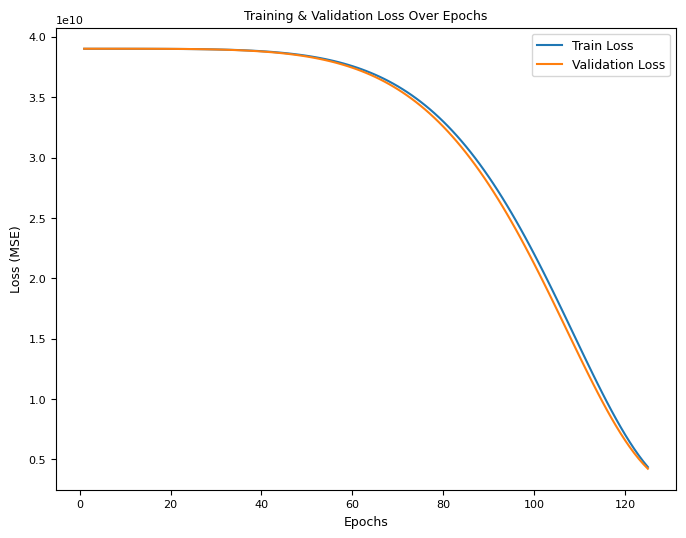


Comparison of Predicted vs Actual House Prices:
Predicted: $107,044.27 | Actual: $64,500.00
Predicted: $85,924.23 | Actual: $87,000.00
Predicted: $73,487.99 | Actual: $90,000.00
Predicted: $168,064.88 | Actual: $189,000.00
Predicted: $127,477.02 | Actual: $160,000.00
Predicted: $98,207.23 | Actual: $127,000.00
Predicted: $97,638.37 | Actual: $117,000.00
Predicted: $67,170.59 | Actual: $79,000.00
Predicted: $206,053.41 | Actual: $302,000.00
Predicted: $123,438.94 | Actual: $144,000.00
Predicted: $181,612.91 | Actual: $236,500.00
Predicted: $106,009.88 | Actual: $159,500.00
Predicted: $145,078.88 | Actual: $163,900.00
Predicted: $113,960.55 | Actual: $161,750.00
Predicted: $199,070.58 | Actual: $180,000.00
Predicted: $147,901.91 | Actual: $159,000.00
Predicted: $143,314.72 | Actual: $210,000.00
Predicted: $119,310.62 | Actual: $129,900.00
Predicted: $179,248.48 | Actual: $260,000.00
Predicted: $176,248.56 | Actual: $228,000.00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert Pandas DataFrames to PyTorch tensors
X_train = torch.tensor(train_preprocessed_df.values, dtype=torch.float32)
y_train = torch.tensor(strat_train_set["SalePrice"].values, dtype=torch.float32).view(-1, 1)

X_val = torch.tensor(validation_preprocessed_df.values, dtype=torch.float32)
y_val = torch.tensor(strat_validation_set["SalePrice"].values, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(test_preprocessed_df.values, dtype=torch.float32)
y_test = torch.tensor(strat_Test_set["SalePrice"].values, dtype=torch.float32).view(-1, 1)

# Define the Neural Network
class HousePriceNN(nn.Module):
    def __init__(self, input_size):
        super(HousePriceNN, self).__init__()
        self.model = nn.Sequential(
             nn.Linear(input_size, 450),
             nn.ReLU(),
             nn.Linear(450, 200),
             nn.ReLU(),
             nn.Linear(200, 70),
             nn.ReLU(),
             nn.Linear(70, 1)  # Output layer (predicts SalePrice)
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model
input_size = X_train.shape[1]  # Number of features
model = HousePriceNN(input_size)

# Define Loss Function (MSE) and Optimizer
criterion = nn.MSELoss()
#criterion = MSLELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# Training function
def train_model(model, X_train, y_train, X_val, y_val, epochs=100):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()  # Set model to training mode
        optimizer.zero_grad()  # Clear previous gradients
        y_pred = model(X_train)  # Forward pass
        loss = criterion(y_pred, y_train)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        # Validation loss
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

        # Print loss per epoch
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {loss.item():.2f}, Val Loss: {val_loss.item():.2f}")

    # Plot training and validation loss
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, epochs+1), train_losses, label="Train Loss")
    plt.plot(range(1, epochs+1), val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.title("Training & Validation Loss Over Epochs")
    plt.legend()
    plt.show()

# Train the model
train_model(model, X_train, y_train, X_val, y_val, epochs=125)

# Test the model on a few samples
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test[:20])  # Predict first 5 samples
    y_test_pred = y_test_pred.numpy().flatten()
    actual_prices = y_test[:20].numpy().flatten()

# Compare predictions with actual values
print("\nComparison of Predicted vs Actual House Prices:")
for i in range(20):
    print(f"Predicted: ${y_test_pred[i]:,.2f} | Actual: ${actual_prices[i]:,.2f}")

#### **Task 2: Report on your model** - 5 marks

**Task deliverables**:
- Write a brief report (max. 300 words), answering the following questions:
    - What do you think about the performance of your model training in Task 1?
    - What could you try to do to improve the predictive performance of your model?
    - What did you find the most challenging when training the model and how did you solve it?


***Report***
The performance of the trained neural network was reasonable but had room for improvement. The training and validation loss decreased consistently over epochs, indicating that the model was learning. However, the final validation loss suggested that the model was not generalizing perfectly to unseen data. While the predictions on test samples were close to actual house prices, some variations indicated that the model might still benefit from fine-tuning.

To improve the predictive performance, several strategies could be applied. First, hyperparameter tuning could help optimize the learning rate, number of neurons per layer, and batch size. Second, adding dropout layers or L2 regularization could prevent potential overfitting. Also optimizing the number of epochs could help.

The key challenges I faced during model training were:
a) Preprocessing the data and ensuring meaningful feature representation. Handling mutual information and applying one-hot encoding correctly (using sparse_output=False) was essential to avoid errors.
b) Bringing the predicted values within a reasonable range. I experimented with various strategies, including changing the loss function, activation functions, the number of neurons in each layer, and the number of epochs. Eventually, I was able to improve the model's predictions by optimizing the number of neurons and epochs to reduce variance.